## Introduction to visualizing data in the eeghdf files

In [1]:
# %load explore-eeghdf-files-basics.py
# Here is an example of how to do basic exploration of what is in the eeghdf file. I show how to discover the fields in the file and to plot them.
# 
# I have copied the stacklineplot from my python-edf/examples code to help with display. Maybe I will put this as a helper or put it out as a utility package to make it easier to install.

from __future__ import print_function, division, unicode_literals
import os.path
%matplotlib inline
# %matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import pandas as pd
import numpy as np
import h5py
from pprint import pprint

import eegvis.stacklineplot as stacklineplot
import eegvis.montageview as montageview

# matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

# need to point these to where I have some example files
ARCHIVEDIR = r'../../eeghdf/data'
EEGFILE = os.path.join(ARCHIVEDIR, 'spasms.eeghdf')

In [2]:
ls ../../eeghdf/data

absence_epilepsy.eeghdf*  spasms.eeghdf*  tuh_00000115_s07_a00.edf*


In [3]:
%pdb

Automatic pdb calling has been turned ON


In [4]:
pwd

'/mnt/home2/clee/code/eegml/eegvis/notebooks'

In [5]:
hdf = h5py.File(EEGFILE) 

/usr/local/anaconda3/envs/pytorch15/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [6]:
rec = hdf['record-0']
years_old = rec.attrs['patient_age_days']/365
pprint("age in years: %s" % years_old)

'age in years: 0.4590580923389143'


In [7]:
signals = rec['signals']
labels = rec['signal_labels']
electrode_labels = [str(s,'ascii') for s in labels]
numbered_electrode_labels = ["%d:%s" % (ii, str(labels[ii], 'ascii')) for ii in range(len(labels))]

In [9]:
# signals = signals[:,:]

#### Simple visualization of EEG (electrodecrement seizure pattern)

In [10]:
# plot 10s epochs (multiples in DE)
ch0, ch1 = (0,19)
DE = 2 # how many 10s epochs to display
epoch = 53; ptepoch = 10*int(rec.attrs['sample_frequency'])
dp = int(0.5*ptepoch)
# stacklineplot.stackplot(signals[ch0:ch1,epoch*ptepoch+dp:(epoch+DE)*ptepoch+dp],seconds=DE*10.0, ylabels=electrode_labels[ch0:ch1], yscale=0.3)
print("epoch:", epoch)



epoch: 53


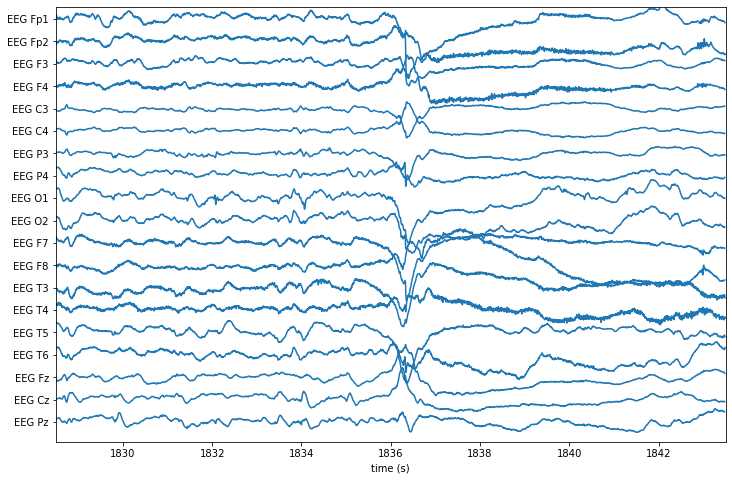

In [19]:
# search identified spasms at 1836, 1871, 1901, 1939
stacklineplot.show_epoch_centered(signals, 1836,
                        epoch_width_sec=15,
                        chstart=0, chstop=19, fs=rec.attrs['sample_frequency'],
                        ylabels=electrode_labels, yscale=3.0)



In [17]:
signals[0:5, 0:4].shape
#stacklineplot.stackplot(signals[0:5, 0:4], topdown=True)

(5, 4)

In [19]:
electrode_labels
r_labels = [ss.replace('EEG ','') for ss in electrode_labels]
r_labels

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz',
 'E',
 'Pg1',
 'Pg2',
 'A1',
 'A2',
 'FT9',
 'FT10',
 'ECG X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'Mark1',
 'Mark2',
 'Events/Markers']

In [20]:
montageview.DB_LABELS

['Fp1-F7',
 'F7-T3',
 'T3-T5',
 'T5-O1',
 'Fp2-F8',
 'F8-T4',
 'T4-T6',
 'T6-O2',
 'Fp1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'Fp2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'Fz-Cz',
 'Cz-Pz']